In [1]:
#import tensorflow, 無論 CPU 或 GPU 版本都是 import tensorflow as tf
import tensorflow as tf

In [2]:
#將MNIST 手寫數字資料讀進來
mnist = tf.keras.datasets.mnist

# mnist 的load_data()會回傳已經先分割好的training data 和 testing data
# 並且將每個 pixel 的值從 Int 轉成 floating point 同時做normalize(這是很常見的preprocessing)
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print(len(x_train)) #training data 總共有60000張圖片
print(x_train[0].shape) #每張圖片（拿第一張當樣本）大小為 28x28

60000
(28, 28)


In [4]:
# 開始搭建model
# 利用 "Sequential" 把每層 layer 疊起來

# input 大小為 28 x 28

# 最後的 Dense(10) 且 activation 用 softmax
# 代表最後 output 為 10 個 class （0~9）的機率
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

# model每層定義好後需要經過compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# 將搭好的 model 去 fit 我們的 training data
# 並evalutate 在 testing data 上
history = model.fit(x_train, y_train, epochs=5 ,validation_split=0.2)
model.evaluate(x_test, y_test, verbose=2)

Epoch 1/5
1500/1500 [==============================] - 7s 3ms/step - loss: 0.3252 - accuracy: 0.9058 - val_loss: 0.1515 - val_accuracy: 0.9587
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1574 - accuracy: 0.9532 - val_loss: 0.1129 - val_accuracy: 0.9666
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1170 - accuracy: 0.9654 - val_loss: 0.0950 - val_accuracy: 0.9712
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0953 - accuracy: 0.9704 - val_loss: 0.0955 - val_accuracy: 0.9735
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0818 - accuracy: 0.9748 - val_loss: 0.0953 - val_accuracy: 0.9739
313/313 - 1s - loss: 0.0824 - accuracy: 0.9745


[0.08238348364830017, 0.9745000004768372]

In [6]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

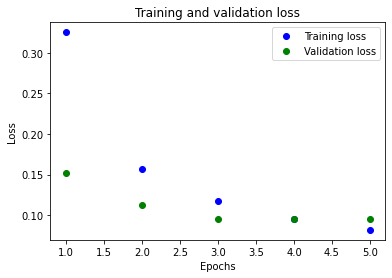

In [10]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'go', label='Validation loss')
# b is for "solid blue line"
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

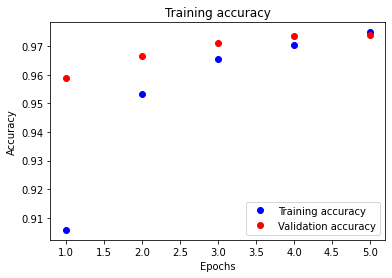

In [11]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
valacc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, valacc_values, 'ro', label='Validation accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()